<a href="https://colab.research.google.com/github/markusloecher/DataScience2021/blob/main/TWSM/Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Functions

In [65]:
import numpy as np
import pandas as pd

# function for transformation
def transform_df(text):
    
    (unique, counts) = np.unique(text.split(), return_counts=True)
    df_words = pd.DataFrame(unique, counts).reset_index().rename(columns = {"index":"counts", 0:"word"}).sort_values(by = "counts", ascending = False)
    df_words["rank"] =  df_words["counts"].rank(ascending=False)
    
    return df_words



def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

def tf_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results



## Data Sets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"
bing = pd.read_csv(TWSM_path+"bing.csv")

bing

,Unnamed: 0,word,sentiment
0,1,2-faces,negative
1,2,abnormal,negative
2,3,abolish,negative
3,4,abominable,negative
4,5,abominably,negative
...,...,...,...
6781,6782,zealously,negative
6782,6783,zenith,positive
6783,6784,zest,positive
6784,6785,zippy,positive


## Gutenberg

In [ ]:
!pip install gutenberg

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

In [10]:
text = strip_headers(load_etext(42671)).strip()
#text = load_etext(42671)
#print(text)

In [11]:
TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"
afinn = pd.read_csv(TWSM_path+"afinn.csv")

afinn

,Unnamed: 0,word,value
0,1,abandon,-2
1,2,abandoned,-2
2,3,abandons,-2
3,4,abducted,-2
4,5,abduction,-2
...,...,...,...
2472,2473,yucky,-2
2473,2474,yummy,3
2474,2475,zealot,-2
2475,2476,zealots,-2


In [27]:
dic = afinn
dic
#sentiment_merge = pd.merge(dic, df_words, how="inner", on="word")
#sentiment_merge = pd.merge(dic, df_words, left_on="word", right_on="words")
#sentiment_merge["total_value"] = sentiment_merge["value"] * sentiment_merge["counts"]
#ovr_score = np.mean(sentiment_merge["total_value"])

#print(ovr_score)

,Unnamed: 0,word,value
0,1,abandon,-2
1,2,abandoned,-2
2,3,abandons,-2
3,4,abducted,-2
4,5,abduction,-2
...,...,...,...
2472,2473,yucky,-2
2473,2474,yummy,3
2474,2475,zealot,-2
2475,2476,zealots,-2


## IMD Movie Reviews


***Loading the IMDB dataset***

In [14]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [86]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [18]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([12500, 12500]))

**Decoding reviews back to text**

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [20]:
N=len(train_data)
decoded_reviews = ["" for x in range(N)]

for j in range(N):
  decoded_reviews[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[j]])

In [22]:
decoded_reviews[0]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [36]:
from numpy.ma.core import zeros
#dic=afinn
def SentByReview(decoded_review, dic):
  df_words= transform_df(decoded_review)
  #df_words.head()
  #sentiment_merge = pd.merge(dic, df_words, how="inner", on="words")
  sentiment_merge = pd.merge(dic, df_words, left_on="word", right_on="word")
  sentiment_merge["total_value"] = sentiment_merge["value"] * sentiment_merge["counts"]
  ovr_score = np.mean(sentiment_merge["total_value"])
  return ovr_score

N = len(decoded_reviews)
SentScore = np.zeros(N)

for i in range(N):
  SentScore[i] = SentByReview(decoded_reviews[i], afinn)

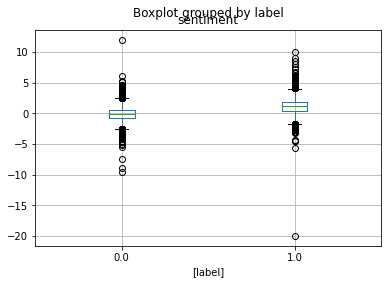

In [59]:
y_train = np.asarray(train_labels).astype("float32")
SentimentByLabel = pd.DataFrame(y_train, SentScore).reset_index().rename(columns = {"index":"sentiment", 0:"label"})

SentimentByLabel.boxplot(by="label");

In [77]:
pd.crosstab(SentScore>0, y_train)

col_0,0.0,1.0
row_0,,
False,6827,1905
True,5673,10595


In [46]:
  #!pip install copy
  from copy import deepcopy
  
  np.sum(np.isnan(SentScore))
  SentScore2 = deepcopy(SentScore)
  SentScore[np.isnan(SentScore)]=0

In [75]:
import statsmodels.api as sm

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

model = sm.OLS(y_train, SentScore).fit()
#predictions = model.predict(X) 
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.362
Method:                 Least Squares   F-statistic:                          1.416e+04
Date:                Tue, 12 Apr 2022   Prob (F-statistic):                        0.00
Time:                        13:26:26   Log-Likelihood:                         -21198.
No. Observations:               25000   AIC:                                  4.240e+04
Df Residuals:                   24999   BIC:                                  4.241e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3088      0.003    119.005      0.000       0.304       0.314
==============================================================================
Omnibus:                     1278.159   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4388.675
Skew:                           0.157   Prob(JB):                         0.00
Kurtosis:                       5.028   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Matrix

In [60]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [69]:
print(x_train.shape)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(x_train, y_train)

(25000, 10000)


RandomForestClassifier(max_depth=20, random_state=0)

In [72]:
yHat_train =clf.predict(x_train)
yHat_test =clf.predict(x_test)

In [73]:
#confusion matrix
pd.crosstab(yHat_train, y_train)

col_0,0.0,1.0
row_0,,
0.0,11233,364
1.0,1267,12136


In [76]:
#confusion matrix
pd.crosstab(yHat_test, y_test)

col_0,0.0,1.0
row_0,,
0.0,10108,1699
1.0,2392,10801


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
re.findall("robert", decoded_review)

### Tasks

Build a classifier on the train data in at least five different ways:

1. using sentiment analysis
2. using term frequencies in at least **4** different flavors.

The data set in 2. is VERY high-dimensional so please choose a classifier that can deal with feature selection.

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec_abs= CountVectorizer(max_df=0.95, min_df=0.05) #Absolute frequency
vec_rel = TfidfVectorizer(max_df=0.95, min_df=0.05, use_idf=False, norm='l1') # Relative frequency
vec_tf=TfidfVectorizer(max_df=0.95, min_df=0.05, smooth_idf=False) #Tf-IDF frequency

# Tranform stemmed data
corpus_sk_abs=vec_abs.fit_transform(decoded_reviews)
#corpus_sk_bin=vec_bin.fit_transform(corpus_sk_abs)
#corpus_sk_rel=vec_rel.fit_transform(data_stem)
#corpus_sk_tf=vec_tf.fit_transform(data_stem)

In [87]:
corpus_sk_abs[0,0]

0

## Task
For each movie review
1. Get all bigrams
2. Filter the ones with "not" in first position
3. Reverse the sentiment analysis


In [95]:
# Two-gram absolute transformer (min=max=2 words)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_df=1, min_df=0)

corpus_sk_bi=bigram_vectorizer.fit_transform(decoded_reviews)
bigrams = bigram_vectorizer.get_feature_names()
print(bigrams)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [96]:
print(len(bigrams))

678566


In [99]:
for f in bigrams:
  if (re.findall("^not ",f)): print(f)
  #if (f.count("not")>0): print(f)

not 12
not 14
not 15
not 1944
not 1963
not 1965
not 1971
not 1985
not 1986
not 1992
not 2007
not 24
not 2nd
not 30
not 3rd
not 40
not 50
not ability
not abraham
not abrupt
not absolute
not absurd
not abuse
not abysmal
not academy
not accidental
not accomplish
not accurately
not achieve
not acknowledge
not active
not acts
not adam
not adaptation
not addressed
not adds
not admiration
not adolescent
not adore
not adults
not advance
not advanced
not advertising
not affecting
not agreed
not aid
not aimed
not akin
not akshay
not alas
not alcohol
not alert
not alike
not alive
not almost
not alot
not ambitious
not america
not americans
not andy
not anger
not angie
not annoyance
not annoyingly
not answered
not ants
not apocalypse
not apocalyptic
not apologize
not apparent
not appealing
not applied
not approach
not arguing
not ariel
not arnie
not arnold
not arrogant
not artsy
not asian
not asked
not assume
not astonishingly
not attempted
not attend
not attended
not attracted
not audiences
not au

In [90]:
words12 = np.array([len(bigrams),2])
#create a 2D matrix
for f in bigrams
  words12 = 
#import re
#re.findall("^not", bigrams)

177

In [84]:
corpus_sk_bi.get_feature_names()

<25000x177 sparse matrix of type '<class 'numpy.int64'>'
	with 492382 stored elements in Compressed Sparse Row format>


## NLP in spacy


In [ ]:
import spacy
nlp = spacy.load('en')

In [16]:
doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")


for token in doc:
    print(token,  token.lemma_)
    #printt(token.)

Apples apple
and and
oranges orange
are be
similar similar
. .
Boots boot
and and
hippos hippos
are be
n't not
. .
